In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join, isdir
from tqdm import tqdm
plt.rcParams['figure.dpi'] = 300

In [2]:
D_fn = {'Gygi':'Gygi-CCLE', 'RNA':'Transcriptomics', 'atl_full_and_kinases':'Atl. Full+Kinase scores',
        'atl_only_full':'Atl. Full Proteome', 'atl_only_phos':'Atl. Phosphoproteome',
        'atlantic': 'Atl. Full+Phosphoproteome', 'drug_scores':'Atl. Drug Scores',
        'identity':'Tissue of Origin', 'kinase_scores':'Atl. Kinase Scores'}

In [3]:
dfd = pd.read_pickle('/home/icb/manuel.gander/Atl/data/Synched_aucs.pkl')
dfd = dfd.drop_duplicates(['PubChem_CID', 'Dr_repr_name']).copy()
D_dr_rep = dict(zip(dfd['PubChem_CID'], dfd['Dr_repr_name']))

In [4]:
mypath='/home/icb/manuel.gander/Atl/data/dones_pca_new'
keys=listdir(mypath)
if '.ipynb_checkpoints' in keys:
    keys.remove('.ipynb_checkpoints')
len(keys)

980

In [5]:
alphas = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]
l1_ratios = [0.01, 0.03, 0.1, 0.3, 0.5, 0.9, 0.99]
datasets = ['RNA', 'atlantic', 'atl_only_full', 'atl_only_phos']
n_pcas = [2, 10, 30, 100, 1000000]

In [6]:
keys2 = []
for dataset in datasets:
    for n_components in n_pcas:
        for alpha in alphas:
            for l1_ratio in l1_ratios:
                keys2.append(f'{dataset}_{alpha}_{l1_ratio}_{n_components}.pkl')

In [7]:
len(keys2)

980

In [8]:
frames = []
for k in tqdm(keys):
    df = pd.read_pickle(mypath+'/'+k)
    frames.append(df)
Df = pd.concat(frames, ignore_index=True)
print(Df['source'].iloc[0])
del Df['source']

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 980/980 [00:49<00:00, 19.61it/s]


MR_NCI60


In [9]:
df = Df.groupby(['PubChem_CID', 'alpha', 'l1_ratio', 'n_pca', 'dataset']).mean().reset_index()
df = df[np.isfinite(df['pearsons'])]
df['drug_repr'] = df['PubChem_CID'].map(D_dr_rep)
df['RMSE_ratio'] = df['RMSE']/df['RMSE_mean_model']
df.sort_values('pearsons')

,PubChem_CID,alpha,l1_ratio,n_pca,dataset,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio
13275,11719003,3.00,0.50,2,RNA,-0.883375,-0.928571,1.000345,0.115391,0.115351,0.002090,49.5,41.0,1000000.0,ulixertinib,1.000345
33981,44182295,10.00,0.30,10,atl_only_phos,-0.795091,-0.806061,1.000062,0.171041,0.171032,0.002204,49.5,61.0,1000000.0,refametinib,1.000053
33989,44182295,10.00,0.30,100,atl_only_phos,-0.795091,-0.806061,1.000062,0.171041,0.171032,0.002446,49.5,61.0,1000000.0,refametinib,1.000053
33977,44182295,10.00,0.30,2,atl_only_phos,-0.795091,-0.806061,1.000062,0.171041,0.171032,0.002157,49.5,61.0,1000000.0,refametinib,1.000053
33985,44182295,10.00,0.30,30,atl_only_phos,-0.795091,-0.806061,1.000062,0.171041,0.171032,0.002299,49.5,61.0,1000000.0,refametinib,1.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39223,49792852,0.03,0.99,30,RNA,0.820143,0.786571,0.609675,0.073522,0.119001,0.002347,49.5,41.0,1000000.0,NMS-1286937,0.617827
39423,49792852,0.30,0.10,30,RNA,0.820219,0.785286,0.608932,0.073467,0.119001,0.002261,49.5,41.0,1000000.0,NMS-1286937,0.617361
39543,49792852,1.00,0.03,30,RNA,0.820891,0.787786,0.607427,0.073324,0.119001,0.002454,49.5,41.0,1000000.0,NMS-1286937,0.616160
39203,49792852,0.03,0.90,30,RNA,0.821046,0.786857,0.611476,0.073553,0.119001,0.002293,49.5,41.0,1000000.0,NMS-1286937,0.618089


In [10]:
df['Dataset'] = df.dataset.map(D_fn)

Text(0.5, 0, 'RMSE Ratio')

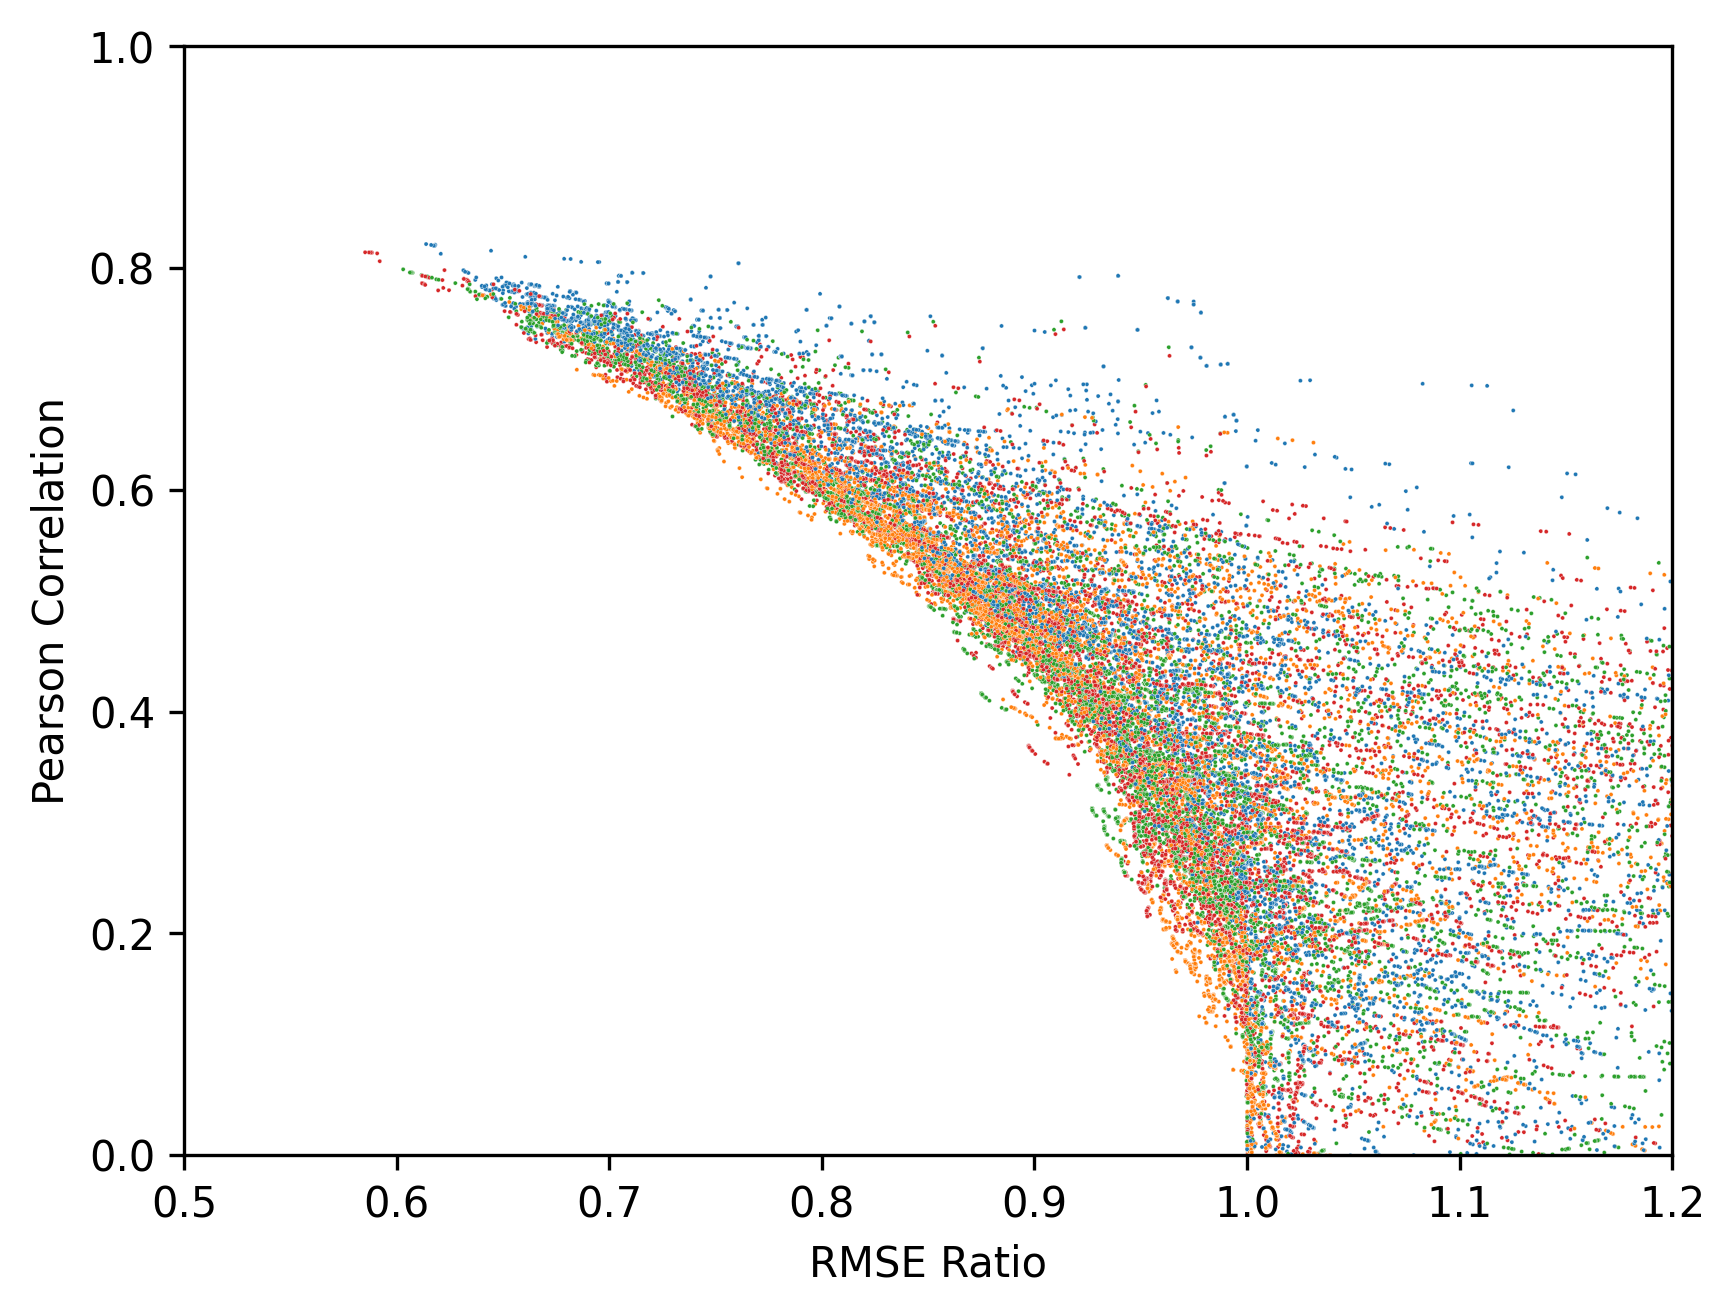

In [12]:
sns.scatterplot(data=df, x='RMSE_ratio', y='pearsons', s=1, hue='Dataset', legend=None)
plt.ylim(0,1)
plt.xlim(0.5,1.2)
plt.ylabel('Pearson Correlation')
plt.xlabel('RMSE Ratio')

/home/icb/manuel.gander/ott_env/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


Text(0.5, 0, 'RMSE Ratio')

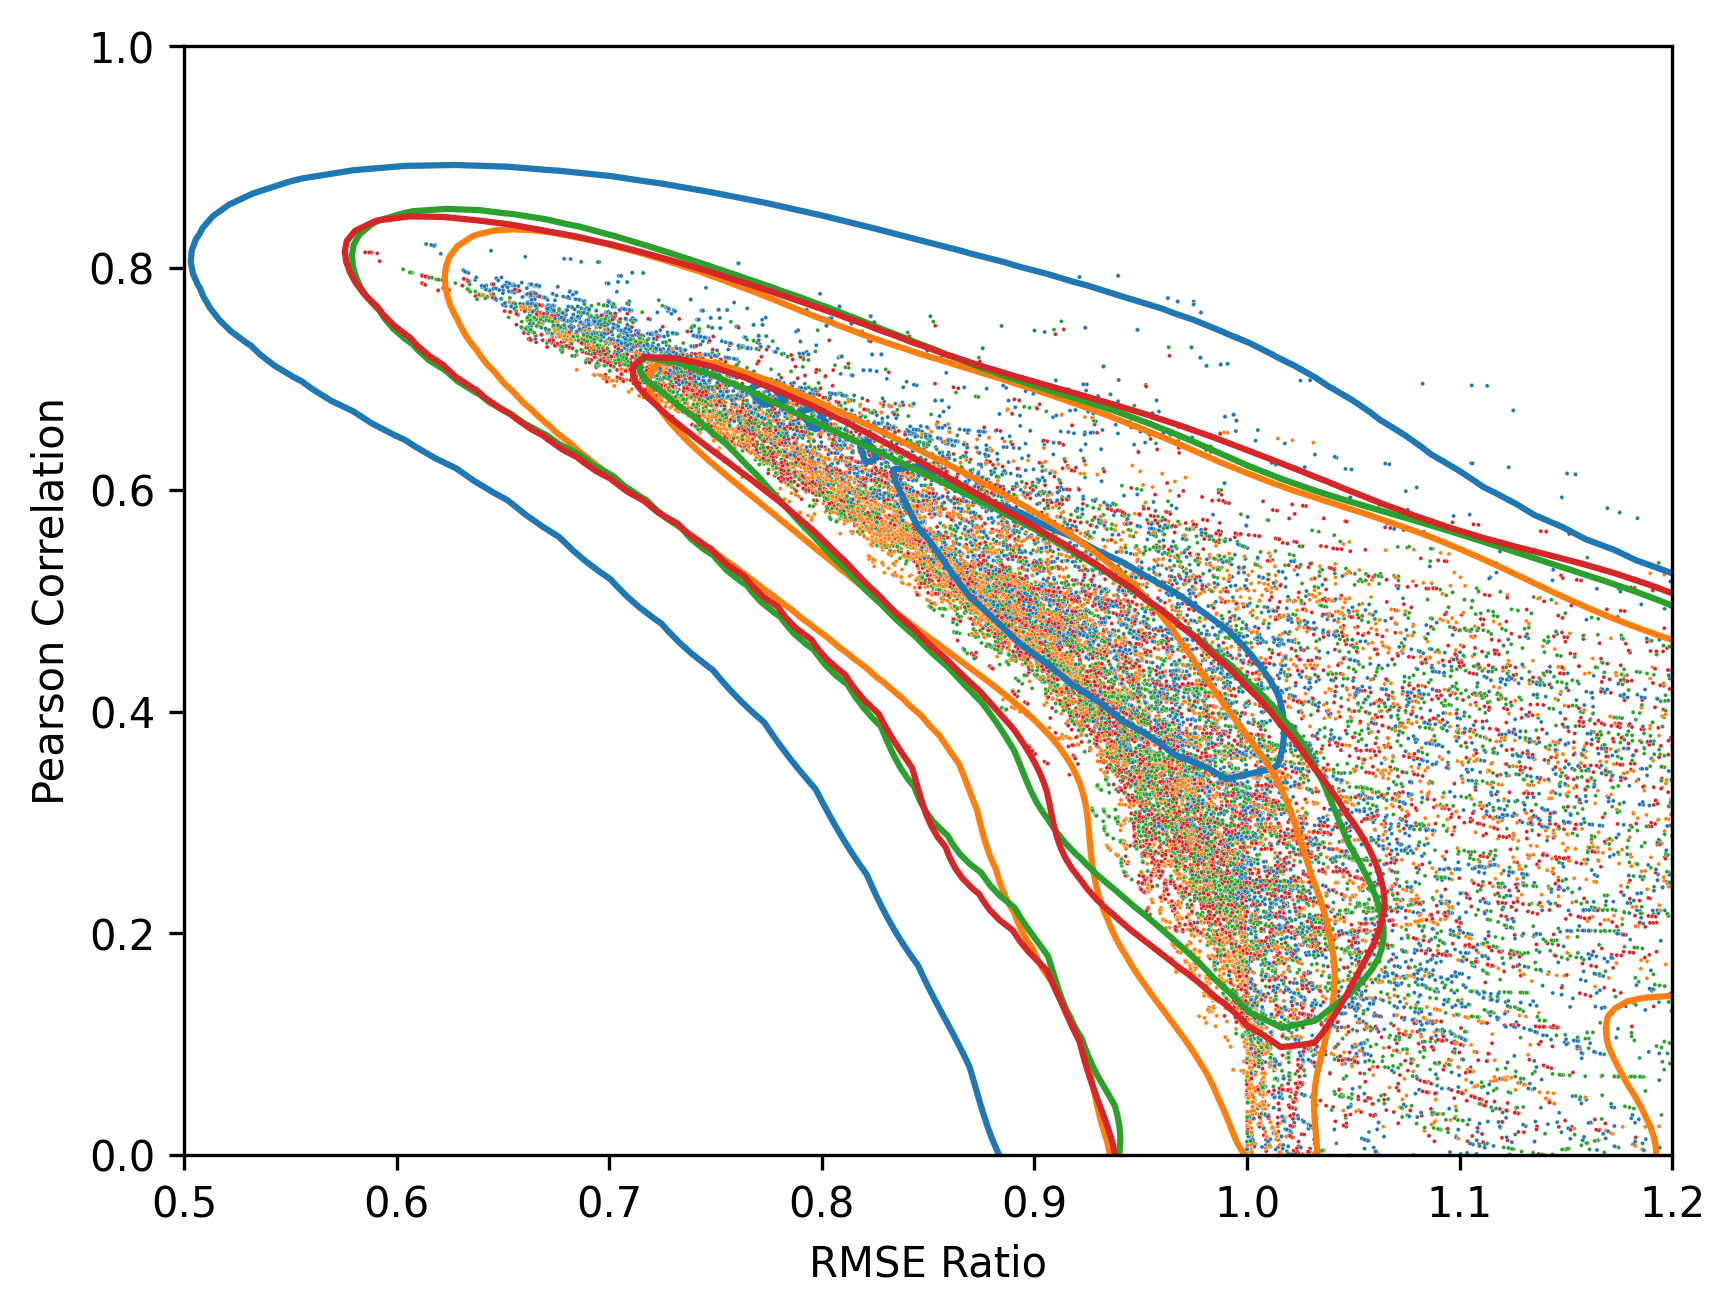

In [15]:
sns.scatterplot(data=df, x='RMSE_ratio', y='pearsons', s=1, hue='Dataset', legend=None)
sns.kdeplot(data=df, x='RMSE_ratio', y='pearsons', s=1, hue='Dataset', legend=None, levels=3)
plt.ylim(0,1)
plt.xlim(0.5,1.2)
plt.ylabel('Pearson Correlation')
plt.xlabel('RMSE Ratio')

In [ ]:
sns.scatterplot(data=dfc, x='RMSE_ratio', y='pearsons', s=100, hue='Dataset')
plt.ylim(0,1)
plt.xlim(0.5,1.2)
plt.ylabel('Pearson Correlation')
plt.ylabel('RMSE Ratio')

In [35]:
df.value_counts('n_pca')

n_pca
10         9118
100        9118
30         9118
2          8999
1000000    6323
Name: count, dtype: int64

In [36]:
# Pick the one with the best l1_ratio and alpha
crit = 'RMSE_ratio'
crit = 'pearsons'

alphas = sorted(set(df['alpha']))
l1_ratios = sorted(set(df['l1_ratio']))
datas = sorted(set(df['dataset']))
ns = sorted(set(df['n_pca']))

frames = []
for data in datas:
    for n in ns:
        dfs = df[(df['dataset']==data)&(df['n_pca']==n)].copy()
        drugs = sorted(set(dfs['PubChem_CID']))
        for d in drugs:
            dfss = dfs[dfs['PubChem_CID']==d]
            if crit=='RMSE_ratio':
                frames.append(dfss.sort_values(crit).iloc[:1])
            else:
                frames.append(dfss.sort_values(crit).iloc[-1:])
dfm = pd.concat(frames, ignore_index=True)
dfm.sort_values('pearsons')

,PubChem_CID,alpha,l1_ratio,n_pca,dataset,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio,Dataset
0,10127622,1.00,0.50,2,RNA,-0.329141,-0.283442,1.033904,0.203685,0.195577,0.002112,49.5,41.0,1000000.0,selumetinib,1.041457,Transcriptomics
809,11152667,0.01,0.01,2,atlantic,-0.273278,-0.276226,1.021834,0.119113,0.116851,0.001670,49.5,62.0,1000000.0,AZD7762,1.019353,Atl. Full+Phosphoproteome
47,71721540,0.30,0.90,2,RNA,-0.262158,-0.194663,1.020875,0.127919,0.123827,0.002293,49.5,41.0,1000000.0,LY-3009120,1.033042,Transcriptomics
23,16666708,0.03,0.90,2,RNA,-0.257588,-0.285787,1.060860,0.226530,0.212335,0.002773,49.5,41.0,1000000.0,AZD8330,1.066852,Transcriptomics
10,11707110,1.00,0.50,2,RNA,-0.251046,-0.216341,1.032396,0.221214,0.213766,0.002146,49.5,41.0,1000000.0,trametinib,1.034841,Transcriptomics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,16666708,3.00,0.50,100,RNA,0.804433,0.795690,0.761129,0.161534,0.212335,0.002243,49.5,41.0,1000000.0,AZD8330,0.760751,Transcriptomics
129,16666708,3.00,0.50,30,RNA,0.804433,0.795690,0.761129,0.161534,0.212335,0.002722,49.5,41.0,1000000.0,AZD8330,0.760751,Transcriptomics
76,16666708,3.00,0.50,10,RNA,0.804435,0.798310,0.761123,0.161533,0.212335,0.002307,49.5,41.0,1000000.0,AZD8330,0.760747,Transcriptomics
961,71721540,3.00,0.01,30,atlantic,0.814297,0.786853,0.566562,0.070963,0.121284,0.001864,49.5,61.0,1000000.0,LY-3009120,0.585099,Atl. Full+Phosphoproteome


In [37]:
dfm.value_counts('n_pca')

n_pca
2          215
10         215
30         215
100        215
1000000    215
Name: count, dtype: int64

In [38]:
D_fn = {'Gygi':'Gygi-CCLE', 'RNA':'Transcriptomics', 'atl_full_and_kinases':'Atl. Full+Kinase scores',
        'atl_only_full':'Atl. Full Proteome', 'atl_only_phos':'Atl. Phosphoproteome',
        'atlantic': 'Atl. Full+Phosphoproteome', 'drug_scores':'Atl. Drug Scores',
        'identity':'Tissue of Origin', 'kinase_scores':'Atl. Kinase Scores'}
dfm['dataset'] = [D_fn[a] for a in dfm['dataset']]

In [39]:
dfm['dataset'] = pd.Categorical(dfm['dataset'], categories=[list(D_fn.values())[a] for a in [-2,1,0,5,3,4,-1,-3]], ordered=True)

In [40]:
dfm['dataset'] = [a for a in dfm['dataset']]

In [58]:
dfm['n_pca2'] = [a if a!=1000000 else 'full' for a in dfm['n_pca']]

Text(0.5, 1.0, 'NCI60 Drugscreen Data')

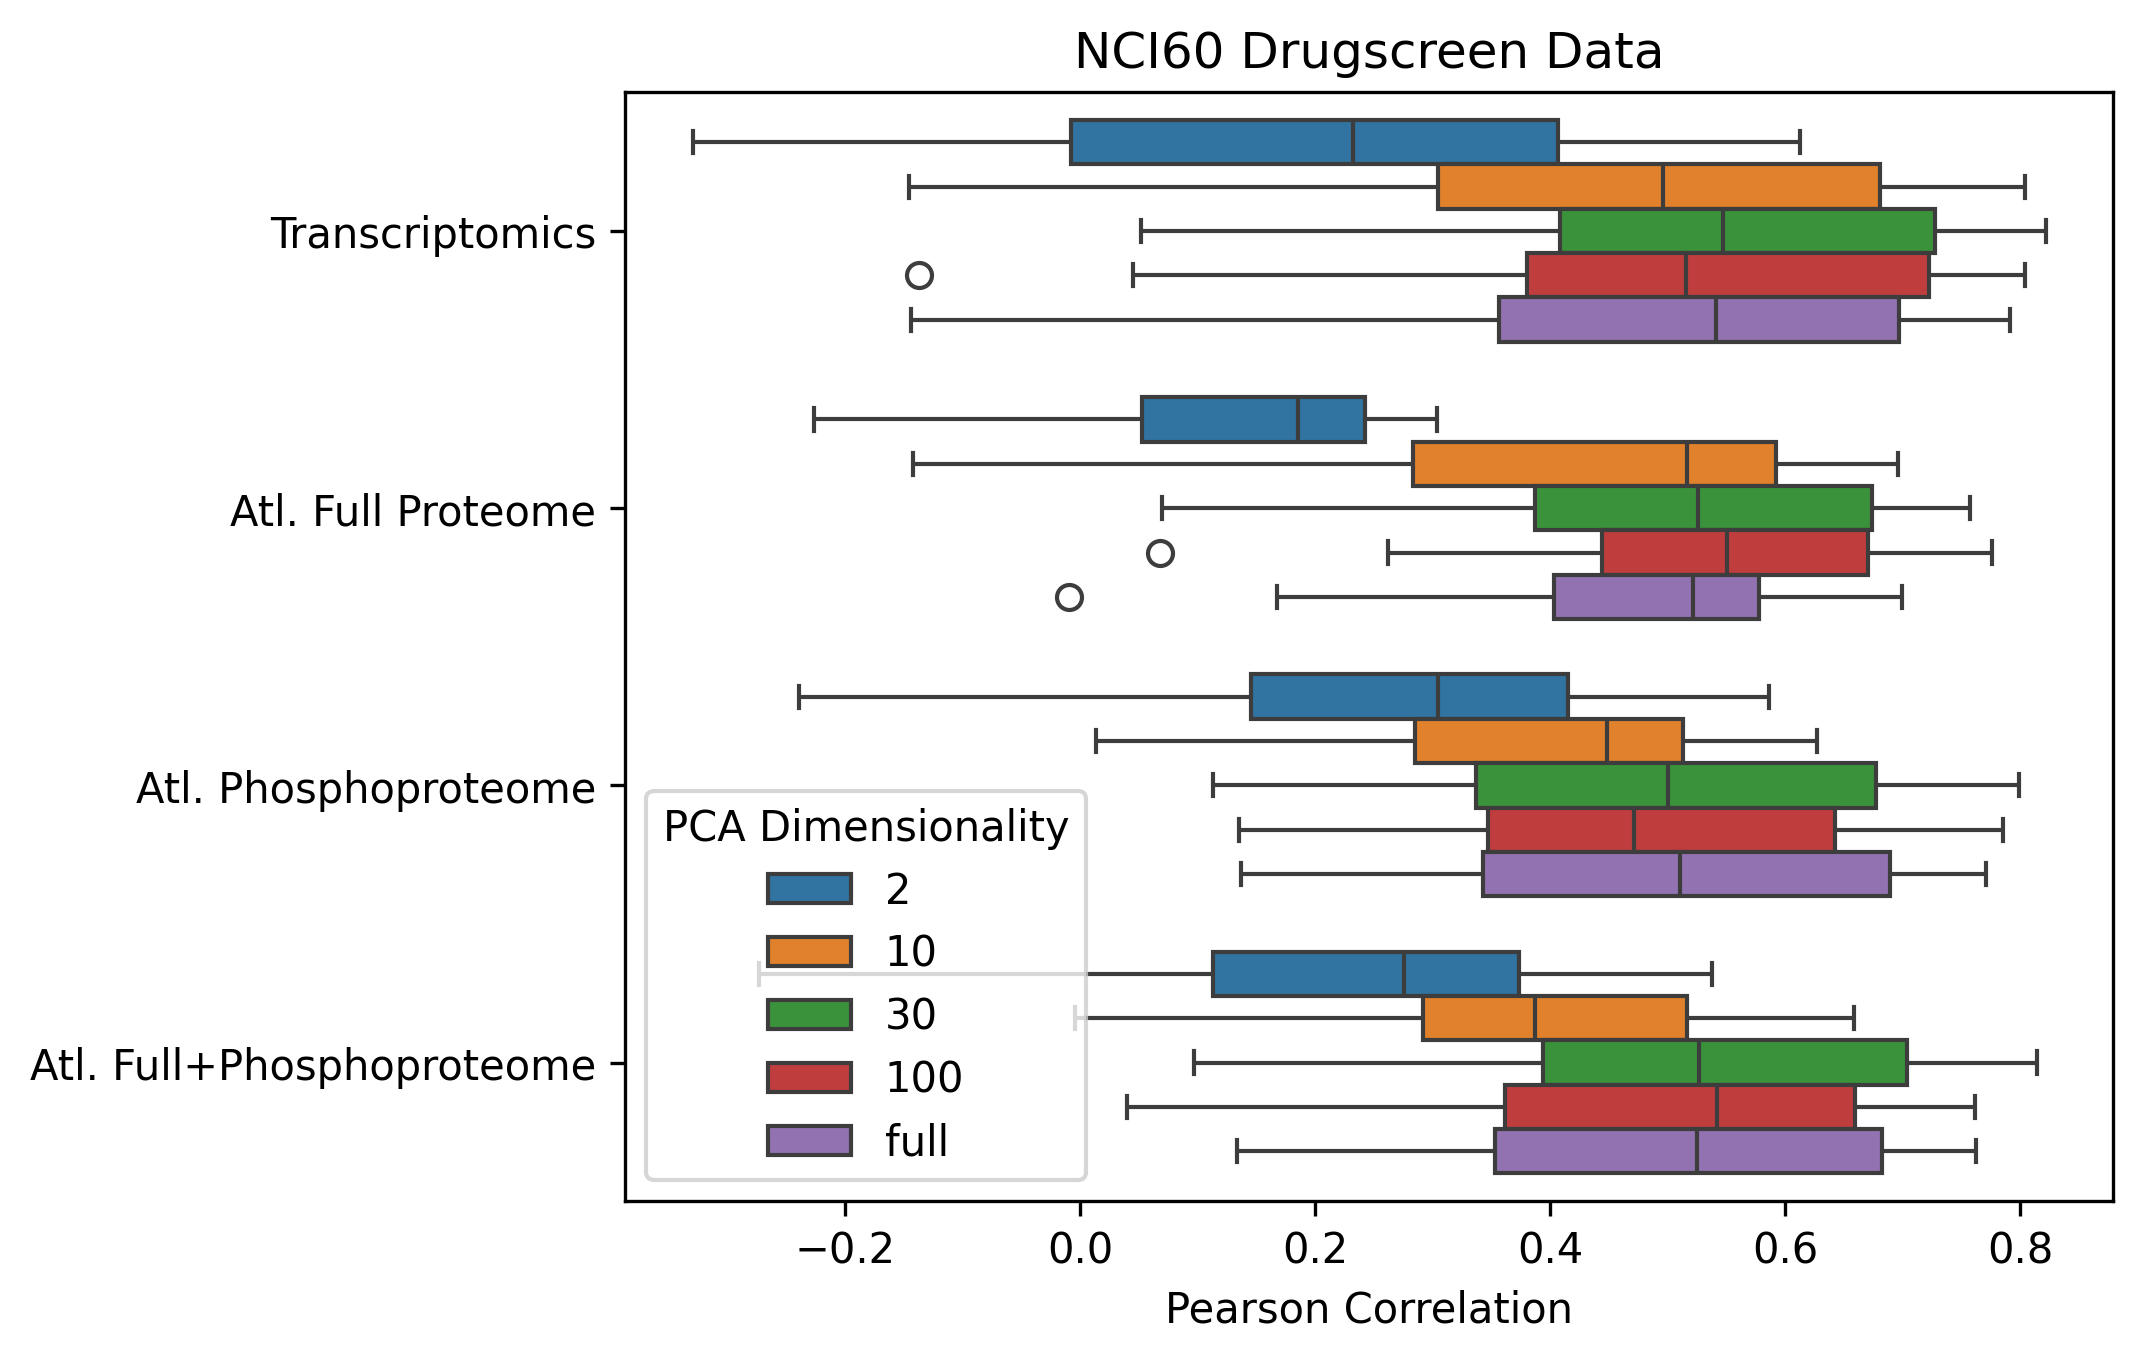

In [59]:
sns.boxplot(data=dfm, x='pearsons', y='dataset', hue='n_pca2', palette = 'tab10')
plt.xlabel('Pearson Correlation')
plt.legend(title='PCA Dimensionality')
plt.ylabel('')
plt.title('NCI60 Drugscreen Data')
#plt.xlabel('Fraction of sampled cells')

(0.5, 1.2)

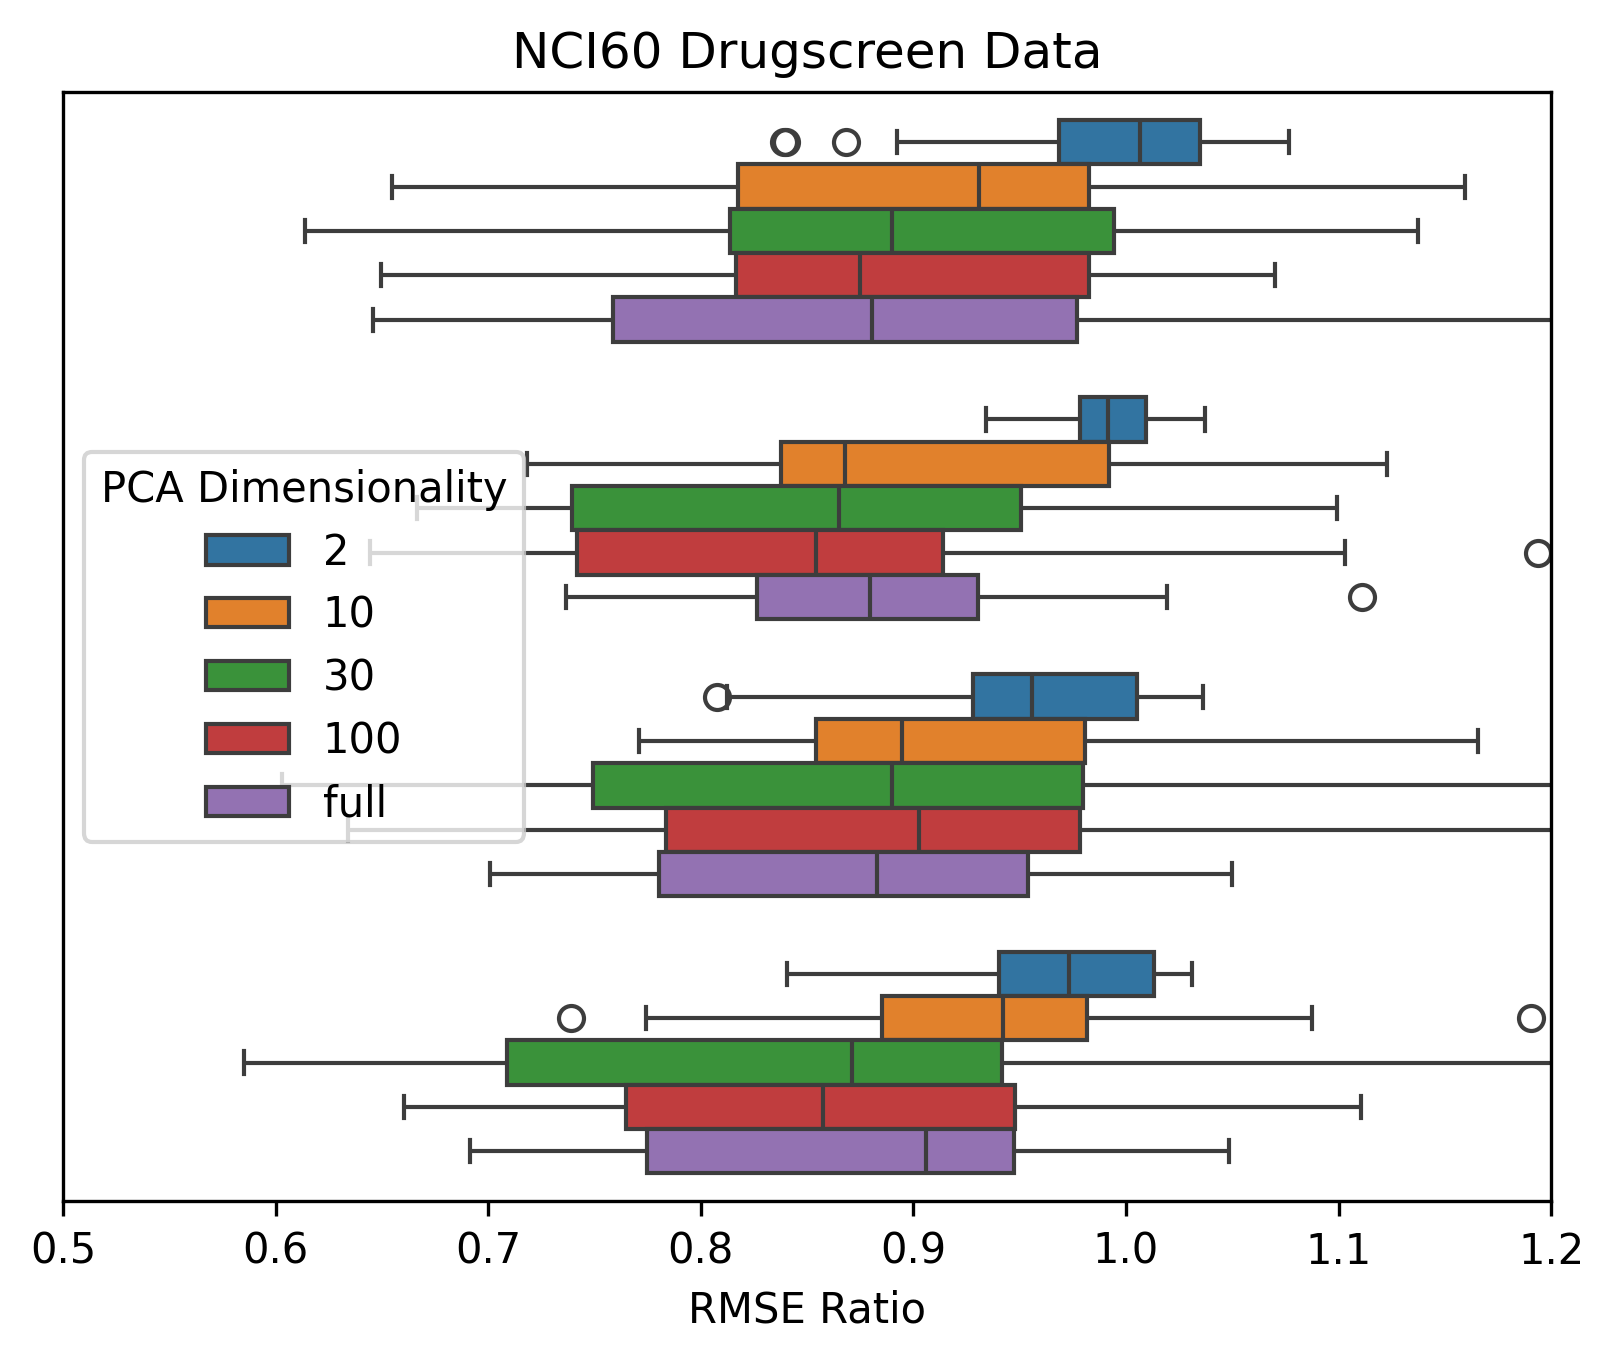

In [121]:
ax = sns.boxplot(data=dfm, x='RMSE_ratio', y='dataset', hue='n_pca2', palette = 'tab10')
plt.xlabel('RMSE Ratio')
plt.legend(title='PCA Dimensionality')
plt.ylabel('')
ax.set_yticks([])
plt.title('NCI60 Drugscreen Data')
plt.xlim(0.5,1.2)
#plt.xlabel('Fraction of sampled cells')

In [134]:
dfm

,PubChem_CID,alpha,l1_ratio,n_pca,dataset,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio,Dataset,n_pca2
0,10127622,1.00,0.50,2,Transcriptomics,-0.329141,-0.283442,1.033904,0.203685,0.195577,0.002112,49.5,41.0,1000000.0,selumetinib,1.041457,Transcriptomics,2
1,10184653,3.00,0.30,2,Transcriptomics,0.424271,0.451000,0.933637,0.120678,0.125444,0.002797,49.5,42.0,1000000.0,afatinib,0.962005,Transcriptomics,2
2,10288191,1.00,0.50,2,Transcriptomics,0.237508,0.220000,1.009807,0.092259,0.093205,0.002113,49.5,41.0,1000000.0,MEK162,0.989856,Transcriptomics,2
3,10461508,0.01,0.01,2,Transcriptomics,0.612773,0.583929,0.867049,0.121987,0.145342,0.002263,49.5,41.0,1000000.0,volasertib,0.839306,Transcriptomics,2
4,11152667,0.30,0.90,2,Transcriptomics,-0.010246,-0.032975,1.017826,0.127351,0.124112,0.002355,49.5,42.0,1000000.0,AZD7762,1.026097,Transcriptomics,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,71721648,3.00,0.01,1000000,Atl. Full+Phosphoproteome,0.287438,0.265559,0.986166,0.063300,0.064751,0.135147,49.5,62.0,1000000.0,CEP-37440,0.977593,Atl. Full+Phosphoproteome,full
1071,86287409,0.03,0.50,1000000,Atl. Full+Phosphoproteome,0.340775,0.337972,0.970958,0.066789,0.070336,0.149306,49.5,61.0,1000000.0,temsirolimus,0.949575,Atl. Full+Phosphoproteome,full
1072,9826528,1.00,0.03,1000000,Atl. Full+Phosphoproteome,0.677150,0.626251,0.773199,0.129320,0.164082,0.163843,49.5,61.0,1000000.0,PD0325901,0.788145,Atl. Full+Phosphoproteome,full
1073,9849735,0.01,0.01,1000000,Atl. Full+Phosphoproteome,0.295320,0.267437,0.971419,0.061038,0.062985,1.192344,49.5,61.0,1000000.0,Sonolisib,0.969096,Atl. Full+Phosphoproteome,full


In [62]:
#Check if it is the same drugs for RNA and Phos

In [135]:
dfm0 = dfm[(dfm['dataset']=='Transcriptomics')&(dfm['full']==100)].copy()
dfm1 = dfm[(dfm['dataset']=='Atl. Full+Phosphoproteome')&(dfm['full']==100)].copy()
dfm1 = dfm[(dfm['dataset']=='Atl. Phosphoproteome')&(dfm['full']==100)].copy()
dfm1 = dfm[(dfm['dataset']=='Atl. Full Proteome')&(dfm['full']==100)].copy()

KeyError: 'full'

In [ ]:
shared_drugs = sorted(set(dfm0['PubChem_CID'])&set(dfm1['PubChem_CID']))

In [ ]:
dfm0s = dfm0[['PubChem_CID', 'pearsons']].copy()
dfm0s.index=dfm0s['PubChem_CID']
del dfm0s['PubChem_CID']
dfm0s['p_RNA'] = dfm0s['pearsons']
del dfm0s['pearsons']
dfm0s = dfm0s.loc[shared_drugs]

In [ ]:
dfm1s = dfm1[['PubChem_CID', 'pearsons']].copy()
dfm1s.index=dfm1s['PubChem_CID'].copy()
del dfm1s['PubChem_CID']
dfm1s['p_atl'] = dfm1s['pearsons']
del dfm1s['pearsons']
dfm1s = dfm1s.loc[shared_drugs]

In [ ]:
dfcomp = pd.concat([dfm0s, dfm1s], axis=1)

(-0.17, 0.9)

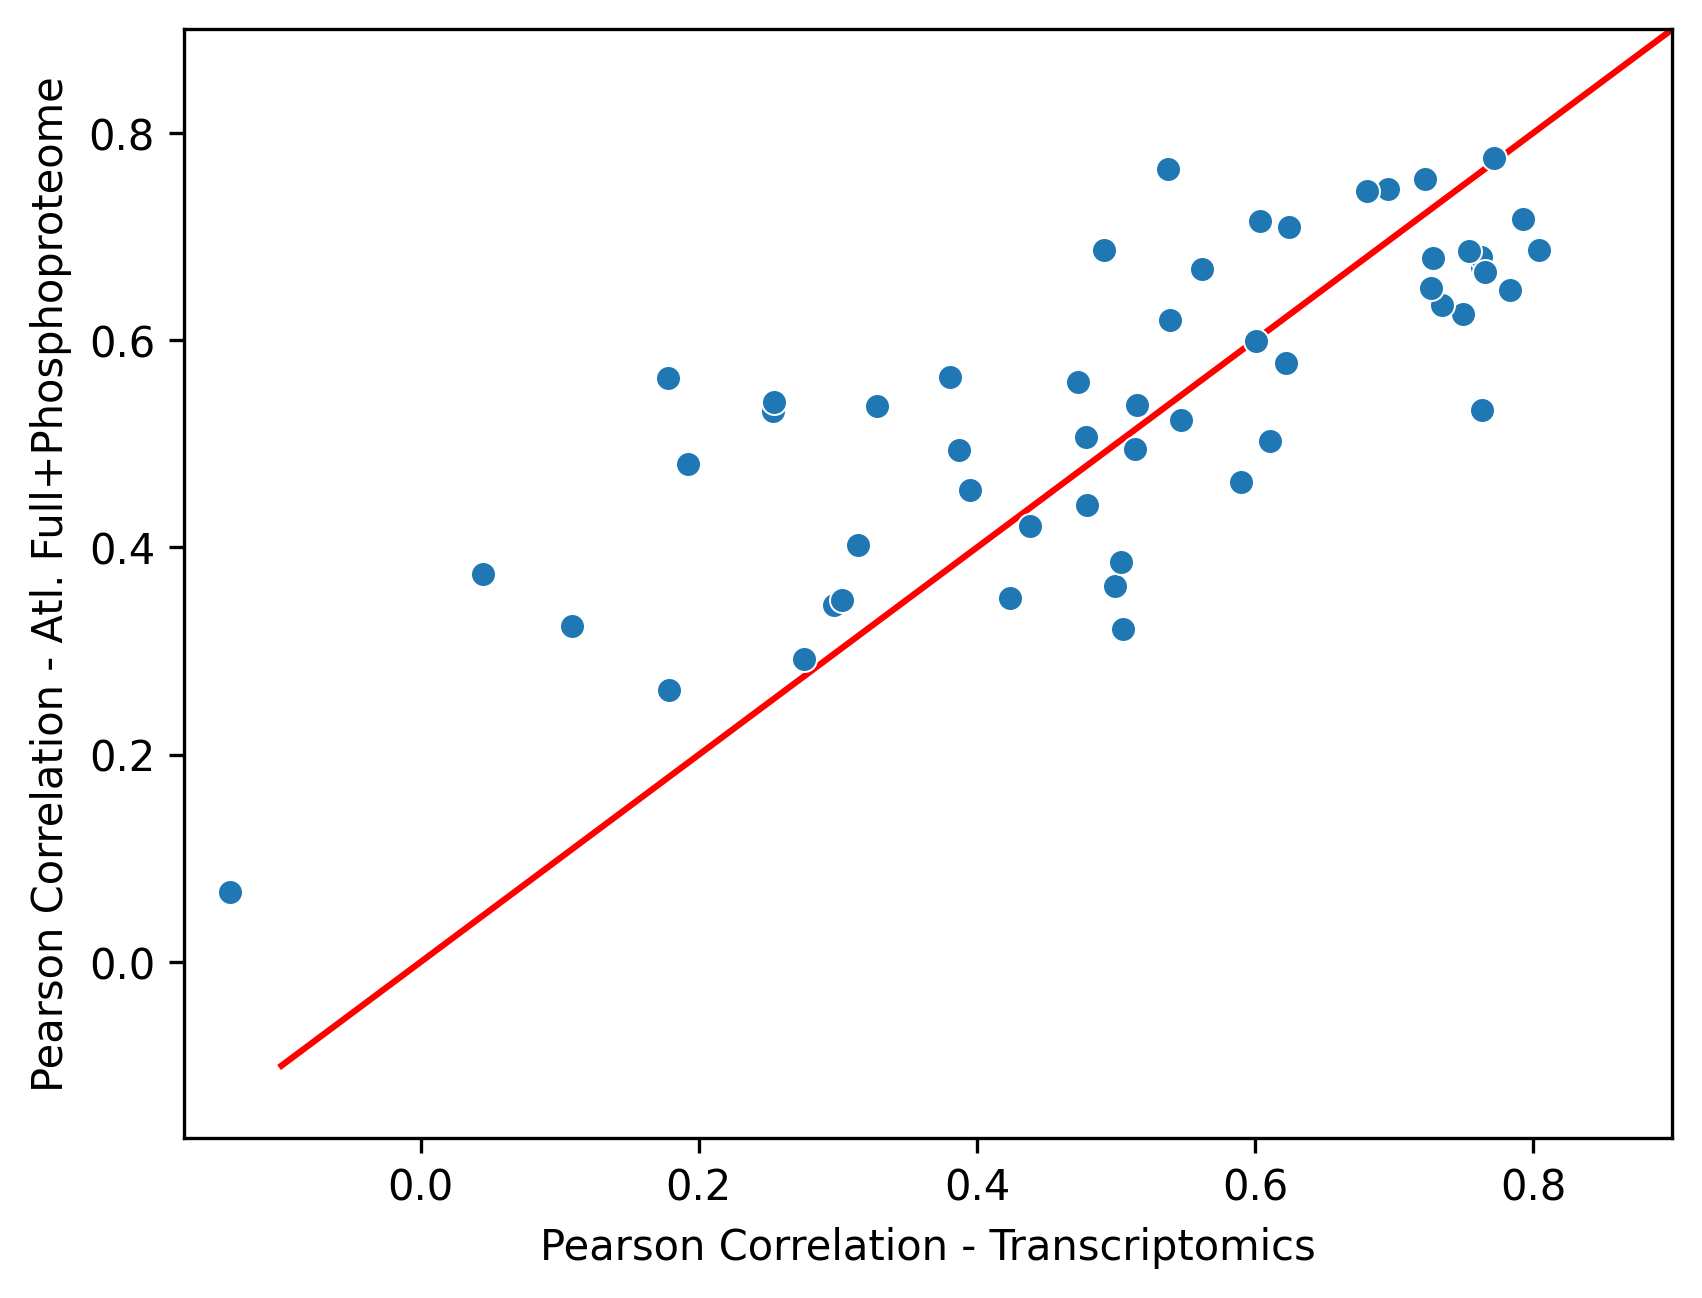

In [136]:
sns.scatterplot(data=dfcomp, x='p_RNA', y='p_atl')
plt.plot([-0.1,1], [-0.1,1], c='r', zorder=-1)
plt.ylabel('Pearson Correlation - Atl. Full+Phosphoproteome')
plt.xlabel('Pearson Correlation - Transcriptomics')
plt.ylim(-0.17,0.9)
plt.xlim(-0.17,0.9)